<h1 style="text-align: center;">Desafío - Estimando curvas de densidad de probabilidad</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.

## Habilidades a evaluar
- Conocer las convenciones y principios rectores de la visualización de gráficos.
- Describir la Ley de los Grandes Números y Teorema del Límite Central y su importancia en la inferencia estadística.

## Descripción
La empresa en la cual usted trabaja quedó muy satisfecha con su análisis anterior del Índice de Desarrollo Humano (IDH) de diversos países, el cual se elaboró para el Ministerio de
Relaciones Exteriores a fin de poder contar con la data necesaria para poder comenzar a trabajar en relaciones diplomáticas más estrechas con diversos países. Por consiguiente, esta vez le solicitan que, a partir del trabajo hecho en el Desafío precedente, usted pueda seguir profundizando en la base de datos Quality of Government, de la Universidad de Gotemburgo.

## Requerimientos
A continuación, revisaremos los requerimientos y acciones que el Ministerio de RREE te pide realizar.

### 1. Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la sesión pasada

In [1]:
# Se utiliza esta celda para importar módulos y el set de datos
import pandas as pd

df = pd.read_csv('subsample_OA_demo.csv')
df

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,0.665,ZAF,SubSaharian,8820.05960,54.146999,4.9,2.218669,6.02955,NaN
1,0.479,AFG,SouthAsia,1282.64000,29.825001,8.1,NaN,3.78028,48.750320
2,0.450,GMB,SubSaharian,1601.88000,NaN,7.7,4.276581,2.76771,NaN
3,0.794,URY,LatAm,12804.84000,3.454000,4.4,2.903505,4.35694,76.348099
4,0.718,DOM,LatAm,10376.63000,NaN,7.6,2.636395,NaN,65.457611
...,...,...,...,...,...,...,...,...,...
92,0.741,ARM,EastEurope,6451.93990,2.980000,6.0,3.455313,2.24660,NaN
93,0.473,MWI,SubSaharian,938.34998,17.604000,8.1,3.185532,4.84254,32.942291
94,0.694,GAB,SubSaharian,14525.28000,NaN,5.5,2.875665,2.66617,NaN
95,0.924,DEU,WesternDem,39486.69900,80.983002,2.1,5.241914,4.95219,NaN


### 2. Importar su conjunto de funciones (2 puntos). Para ello deberás:
- Generar un archivo `ancilliary_funcs.py` para guardar las funciones creadas en la sesión pasada e importe.
- Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.

In [2]:
# Se utiliza esta celda para importar ancilliary_funcs. Recordar que el archivo debe estar en la misma ruta del notebook, y no se debe incluir el .py

from ancilliary_funcs import show_null_cases,fetch_descriptives,dot_plot


In [4]:
# Se utiliza esta celda para inspeccionar los datos nulos

for col in df:
    null_qty, null_percent, _ = show_null_cases(df,col,print_list=True) #Se usa _ para variables que no voy a usar.

    print(f'La columna {col} tiene {null_qty} casos perdidos y corresponde al {round(null_percent,2)}% ')
   

La columna undp_hdi tiene 1 casos perdidos y corresponde al 1.03% 
La columna ccodealp tiene 0 casos perdidos y corresponde al 0.0% 
La columna ht_region tiene 0 casos perdidos y corresponde al 0.0% 
La columna gle_cgdpc tiene 2 casos perdidos y corresponde al 2.06% 
La columna imf_pop tiene 29 casos perdidos y corresponde al 29.9% 
La columna ffp_hf tiene 6 casos perdidos y corresponde al 6.19% 
La columna wef_qes tiene 20 casos perdidos y corresponde al 20.62% 
La columna wdi_expedu tiene 23 casos perdidos y corresponde al 23.71% 
La columna wdi_ners tiene 36 casos perdidos y corresponde al 37.11% 


### 3. Estimar el puntaje Z de una variable (2 puntos): Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
- Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula:
$$
\begin{align}
z_i = (x_i - \bar X / \sigma)
\end{align}
$$

- Para ordenar los valores pueden utilizar la función `sort_values` del DataFrame analizado. Lean la documentación asociada al parámetro `by`.
- Asegúrense de eliminar las observaciones que tengan valores perdidos con `dropna`. Lean la documentación asociada al argumento `subset`.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada.

In [12]:
df.isna().sum().sort_values() #Da como resultado que la columna ubdp_hdi tiene menos nulos

ccodealp       0
ht_region      0
undp_hdi       1
gle_cgdpc      2
ffp_hf         6
wef_qes       20
wdi_expedu    23
imf_pop       29
wdi_ners      36
dtype: int64

In [23]:
df_no_nulo = df.dropna(subset=['undp_hdi'])

In [53]:
# Se utiliza esta celda para generar el puntaje z, ordenar los valores con sort_values, y eliminar los datos nulos con dropna
zscore = lambda x: [(i - x.mean())/x.std() for i in x]
df_no_nulo = df_no_nulo.assign(undp_hdi_zscore = zscore(df_no_nulo['undp_hdi']))
df_no_nulo.sort_values(by='undp_hdi_zscore')

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,undp_hdi_zscore
5,0.399,BFA,SubSaharian,1095.96000,16.500000,6.9,2.868712,4.60476,26.492809,-1.858651
60,0.406,BDI,SubSaharian,663.57001,NaN,6.8,2.595249,5.41642,24.948179,-1.813842
40,0.414,MOZ,SubSaharian,852.39001,25.733000,7.4,2.770460,6.48322,19.439980,-1.762631
45,0.418,ERI,SubSaharian,1007.28000,NaN,7.6,NaN,NaN,28.415560,-1.737026
27,0.421,GNB,SubSaharian,961.26001,NaN,8.5,NaN,2.17313,NaN,-1.717822
...,...,...,...,...,...,...,...,...,...,...
15,0.913,NZL,WesternDem,26481.36900,4.555000,2.1,5.318371,6.33680,96.440018,1.431630
71,0.920,IRL,WesternDem,46422.07000,4.621000,2.8,5.434197,5.32457,99.573357,1.476439
95,0.924,DEU,WesternDem,39486.69900,80.983002,2.1,5.241914,4.95219,NaN,1.502044
47,0.924,SGP,SouthEastAsia,54268.14800,5.470000,3.3,5.797279,2.91579,NaN,1.502044


In [30]:
# Se utiliza esta celda para seleccionar y mostrar las primeras 10 observaciones
df_no_nulo.sort_values(by='undp_hdi_zscore').head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,undp_hdi_zscore
5,0.399,BFA,SubSaharian,1095.96000,16.500,6.9,2.868712,4.60476,26.492809,-1.858651
60,0.406,BDI,SubSaharian,663.57001,NaN,6.8,2.595249,5.41642,24.948179,-1.813842
40,0.414,MOZ,SubSaharian,852.39001,25.733,7.4,2.770460,6.48322,19.439980,-1.762631
45,0.418,ERI,SubSaharian,1007.28000,NaN,7.6,NaN,NaN,28.415560,-1.737026
27,0.421,GNB,SubSaharian,961.26001,NaN,8.5,NaN,2.17313,NaN,-1.717822
81,0.421,SSD,SubSaharian,NaN,NaN,6.9,NaN,1.71297,NaN,-1.717822
77,0.425,COD,SubSaharian,324.16000,NaN,7.1,2.957447,2.24535,NaN,-1.692217
42,0.427,LBR,SubSaharian,488.26999,NaN,6.6,3.472222,2.75756,NaN,-1.679414
16,0.431,SLE,SubSaharian,979.95001,6.232,8.4,2.986086,2.66167,NaN,-1.653809
2,0.450,GMB,SubSaharian,1601.88000,NaN,7.7,4.276581,2.76771,NaN,-1.532184


In [27]:
# Se utiliza esta celda para seleccionar y mostrar las últimas 10 observaciones
df_no_nulo.sort_values(by='undp_hdi_zscore').tail(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,undp_hdi_zscore
82,0.895,BEL,WesternDem,33764.711,11.181000,1.9,5.328891,6.58514,95.285599,1.316406
70,0.896,LUX,WesternDem,61404.480,0.550000,2.1,4.580255,4.08388,84.603470,1.322807
36,0.899,KOR,EastAsia,33181.891,50.747002,3.5,3.615234,5.05211,96.776863,1.342011
41,0.902,JPN,EastAsia,36123.770,127.120003,2.6,4.430102,3.59184,99.042671,1.361215
32,0.908,GBR,WesternDem,34791.051,64.597000,2.1,4.633322,5.73449,98.279984,1.399623
15,0.913,NZL,WesternDem,26481.369,4.555000,2.1,5.318371,6.33680,96.440018,1.431630
71,0.920,IRL,WesternDem,46422.070,4.621000,2.8,5.434197,5.32457,99.573357,1.476439
95,0.924,DEU,WesternDem,39486.699,80.983002,2.1,5.241914,4.95219,NaN,1.502044
47,0.924,SGP,SouthEastAsia,54268.148,5.470000,3.3,5.797279,2.91579,NaN,1.502044
88,0.948,NOR,WesternDem,57634.770,5.156000,1.6,5.048264,7.37329,95.201927,1.655676


**¿Qué características en común se encuentran?**

**Respuesta:** Se observa que los valores extremos están más o menos a la misma cantidad de desviaciones estandar de la media. 

### 4. Estimar el puntaje z de las regiones (2 puntos). 
Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
- Para ello realice un `dotplot` que muestre el valor promedio de su variable por cada región.
- Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar)

<AxesSubplot:title={'center':'Medias de puntaje Z de desarrollo humano por región'}, xlabel='regiones', ylabel='medias'>

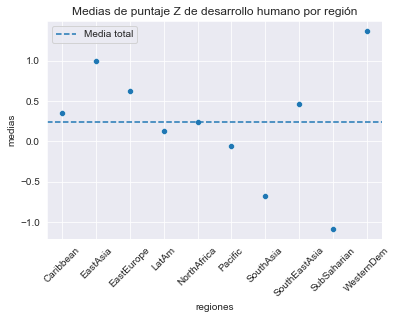

In [70]:
# Se utiliza esta celda para realizar el gráfico solicitado
import matplotlib. pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

df_media_region = df_no_nulo.groupby('ht_region')['undp_hdi_zscore'].mean()
plt.xticks(rotation=45)
plt.axhline(df_media_region.mean(), label='Media total', ls='--')
plt.legend()
plt.title('Medias de puntaje Z de desarrollo humano por región')
plt.ylabel('medias')
plt.xlabel('regiones')
sns.scatterplot(x = df_media_region.index, y = df_media_region.values)

**Comentarios de los resultados** Los países con mejor desarrollo humano promedio se encuentran en la zona WesternDem y los con menos desarrollo humano promedio en la zona SubSaharian

### 5. Generar curvas de Densidad de Probabilidad (2 puntos).
- Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables `imf_pop`, `gle_cgdpc` y `wdi_exph`.
- La función debe contener como argumentos:
    - `df`: Tabla de datos.
    - `variable`: Variable a contrastar.

In [79]:
# Se utiliza esta celda para definir la función solicitada
import numpy as np
from scipy import stats

def plot_prob_density(dataframe,variable):
    mu = dataframe[variable].mean()
    sigma = np.std(dataframe[variable].dropna())

    x_axis = np.linspace(dataframe[variable].min(),dataframe[variable].max())
    plt.plot(
        x_axis,
        stats.norm.pdf(x_axis, mu, sigma),
        label = f'Curva de Densidad PDF para {variable}'
    )
    plt.legend()


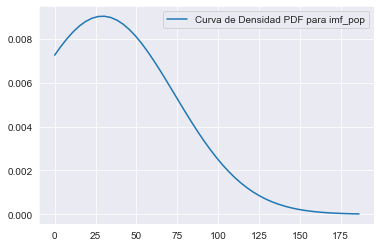

In [73]:
# Se utiliza esta celda para llamar la función para imf_pop
plot_prob_density(df, 'imf_pop')

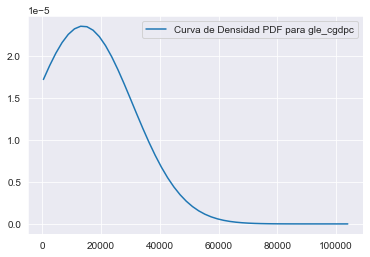

In [75]:
# Se utiliza esta celda para llamar la función para gle_cgdpc
plot_prob_density(df, 'gle_cgdpc')

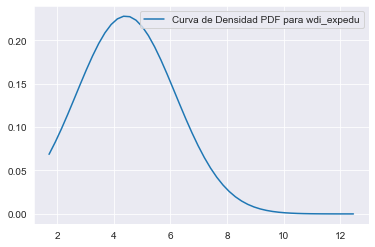

In [77]:
# Se utiliza esta celda para llamar la función para wdi_expedu
plot_prob_density(df, 'wdi_expedu')

**Comentarios de los resultados**
Las 3 curvas de densidad de probabilidad se parecen en forma, en mi caso usé wdi_expedu por mi dataframe generado. En este caso se puede decir que para los países con poco PIB se gasta poco en educación y en general son con baja población total